In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-churn/train.csv
/kaggle/input/bank-churn/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-churn/train.csv')

# Exploring data and gain insights

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.shape

(165034, 14)

Посмотрим, какие значения и какие типы в каждой колонке

In [13]:
from tabulate import tabulate

def print_col_info(df):
    uniq_col_count = []
    for col in df:
        uniq_count = df[col].unique()
        types = set([type(x) for x in uniq_count])
        uniq_col_count.append([col, len(uniq_count), uniq_count[:10], types])

    uniq_col_count.sort(key=lambda x: x[1])

    print(tabulate(uniq_col_count, headers=['Col', 'Uniq_num', 'Values (top 10)', 'Types']))
    
print_col_info(df)

Col                Uniq_num  Values (top 10)                                                           Types
---------------  ----------  ------------------------------------------------------------------------  -------------------------
Gender                    2  ['Male' 'Female']                                                         {<class 'str'>}
HasCrCard                 2  [1. 0.]                                                                   {<class 'numpy.float64'>}
IsActiveMember            2  [0. 1.]                                                                   {<class 'numpy.float64'>}
Exited                    2  [0 1]                                                                     {<class 'numpy.int64'>}
Geography                 3  ['France' 'Spain' 'Germany']                                              {<class 'str'>}
NumOfProducts             4  [2 1 3 4]                                                                 {<class 'numpy.int64'>}
Tenure      

In [5]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# проверим на наличие дубликатов строк

df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [10]:
df.groupby("Exited").agg({"Age": "mean"})

,Age
Exited,
0,36.560480
1,43.958478


Есть небольшой дисбаланс данных 36 / 44

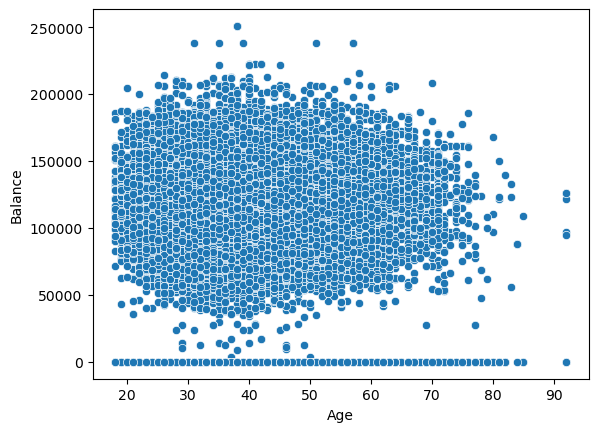

In [20]:
import seaborn as sns
fig = sns.scatterplot(df, x='Age', y='Balance')
plt.show()

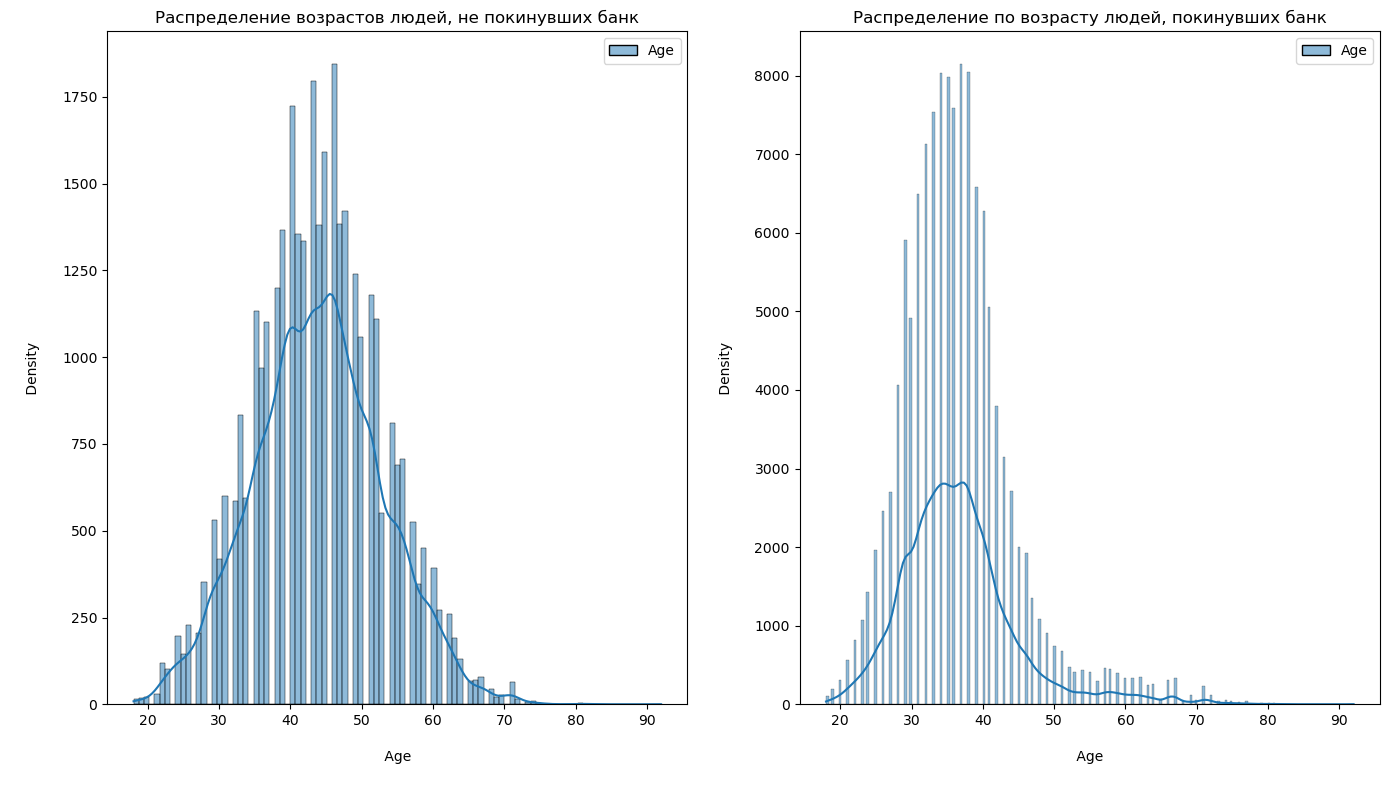

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
sns.histplot(df.loc[df.Exited == 1][["Age"]],kde=True,color="grey", ax=axes[0])
axes[0].set_title('Распределение возрастов людей, не покинувших банк')
axes[0].set_xlabel('\n Age \n')
axes[0].set_ylabel('\n Density \n')

sns.histplot(df.loc[df.Exited == 0][["Age"]],kde=True,color="grey", ax=axes[1])
axes[1].set_title('Распределение по возрасту людей, покинувших банк')
axes[1].set_xlabel('\n Age \n')
axes[1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

Можно выдвинуть инсайт о том, что основная категория пользователей под угрозой - люди возраста 30-40 лет. Это может быть с тем, что мобильное приложение неудобное, длинные переводы или что-то еще. Тк у этого поколения есть потребность в здесь исейчас в отличие от более старшего.

In [26]:
#  Посмотрим статистику по сроку владения

df.groupby("Tenure").agg({"Balance": "mean"})

,Balance
Tenure,
0,61772.331067
1,57901.156943
2,53651.684208
3,56470.567355
4,54324.882710
5,55805.037831
6,55327.924977
7,53036.842830
8,54895.059781


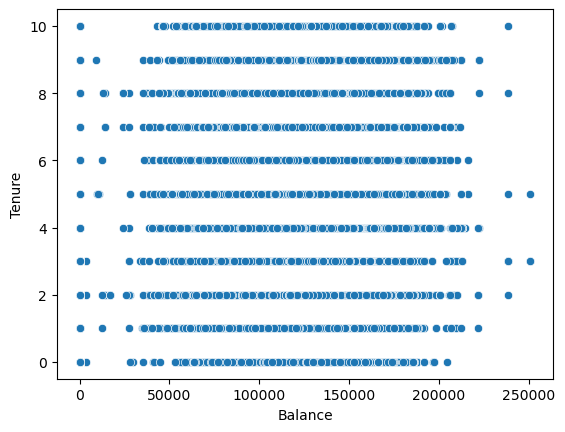

In [27]:
fig = sns.scatterplot(df, x='Balance', y='Tenure')
plt.show()

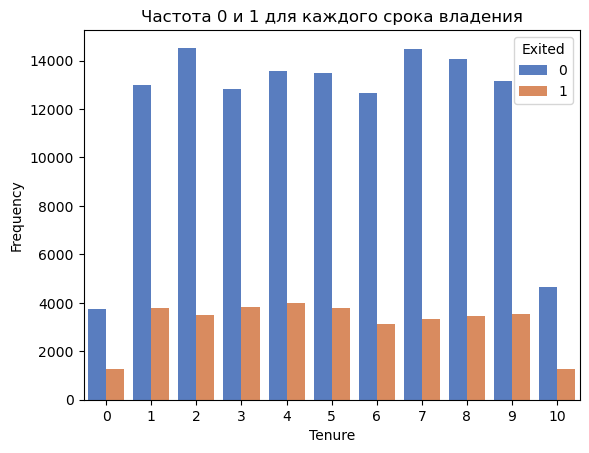

In [28]:
counts = df.groupby(['Tenure', 'Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Tenure', y='Frequency', hue='Exited', data=counts, palette='muted')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Частота 0 и 1 для каждого срока владения')
plt.show()

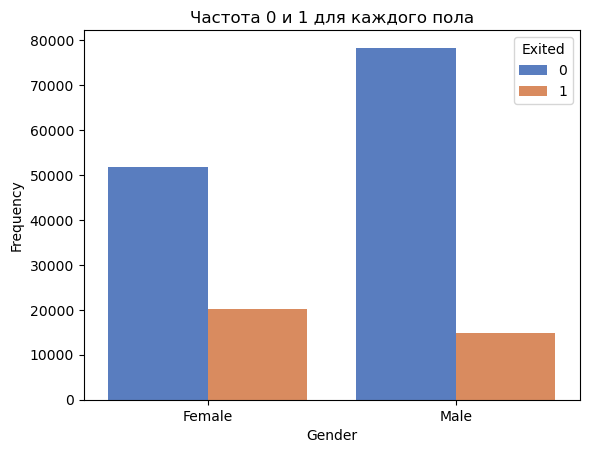

In [29]:
counts = df.groupby(['Gender', 'Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Gender', y='Frequency', hue='Exited', data=counts, palette='muted')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Частота 0 и 1 для каждого пола')
plt.show()

Основная доля пользователей мужчины - значит возможно это связано с бизнес кабинетами и управлением бизнесом. Это тоже как гипотеза, тк доля предпринимателей мужчин больше, чем женщин.

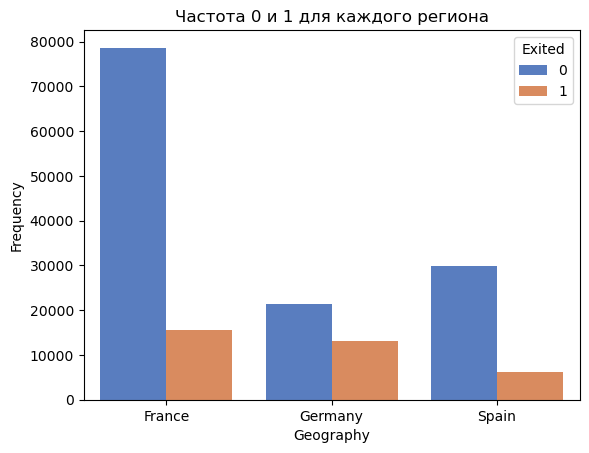

In [30]:
counts = df.groupby(['Geography', 'Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Geography', y='Frequency', hue='Exited', data=counts, palette='muted')
plt.xlabel('Geography')
plt.ylabel('Frequency')
plt.title('Частота 0 и 1 для каждого региона')
plt.show()

Видим, что очень много ушедших клиентов из Франции, что может говорить о региональных особенностях.

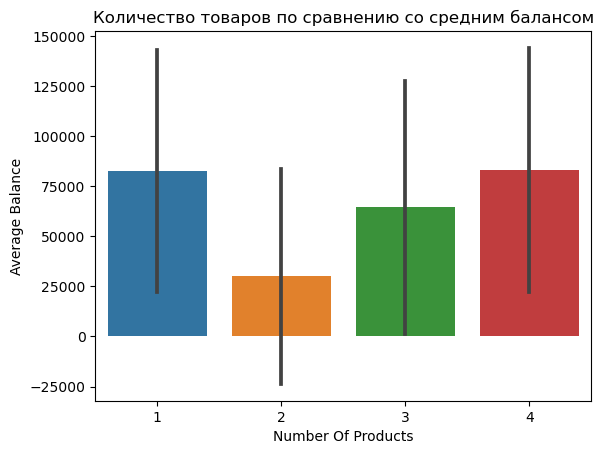

In [47]:
sns.barplot(x=df.NumOfProducts, y=df.Balance, errorbar='sd')
plt.xlabel('Number Of Products')
plt.ylabel('Average Balance')
plt.title('Количество товаров по сравнению со средним балансом')
plt.show()

In [32]:
df.groupby("Exited").agg({"EstimatedSalary": "mean"})

,EstimatedSalary
Exited,
0,112084.293725
1,114402.496656


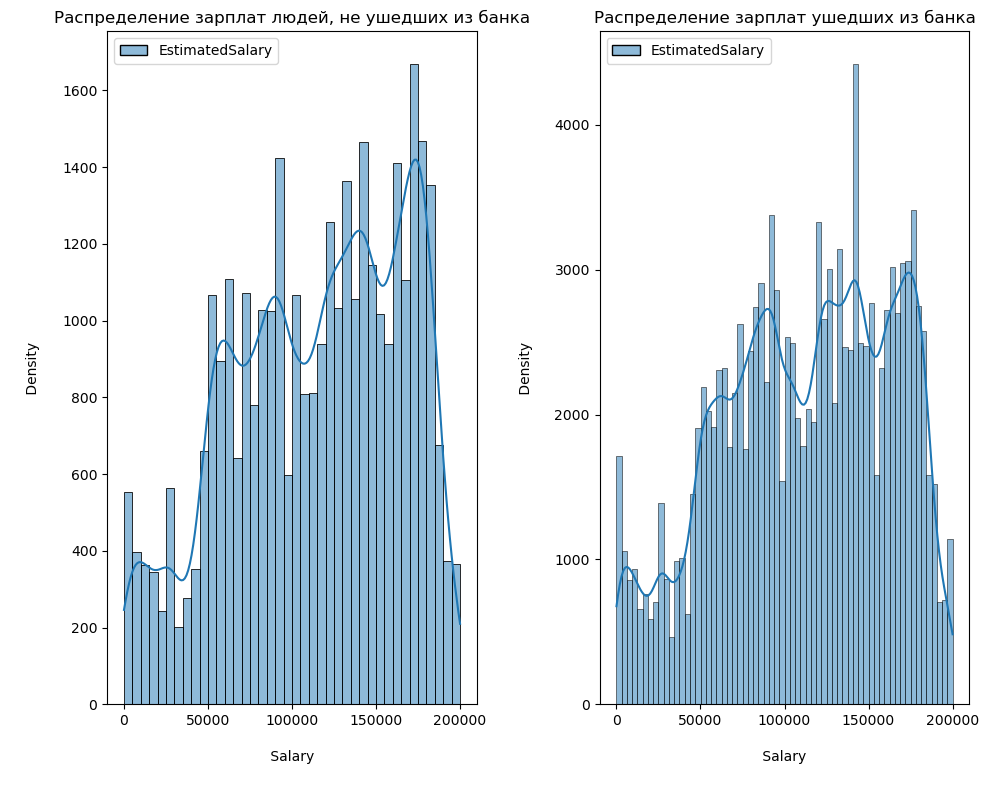

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
sns.histplot(df.loc[df.Exited == 1][["EstimatedSalary"]],kde=True,color="grey", ax=axes[0])
axes[0].set_title('Распределение зарплат людей, не ушедших из банка')
axes[0].set_xlabel('\n Salary \n')
axes[0].set_ylabel('\n Density \n')

sns.histplot(df.loc[df.Exited == 0][["EstimatedSalary"]],kde=True,color="grey", ax=axes[1])
axes[1].set_title('Распределение зарплат ушедших из банка')
axes[1].set_xlabel('\n Salary \n')
axes[1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

Однозначно сказать нельзя, но можно выдвинуть гипотезу. Мы видим, что на левом графике локальные максимумы растут с ростом зарплаты, а справа нет. Это может говорить о том, что в банке основные лояльные клиенты это люди с высоким доходом.

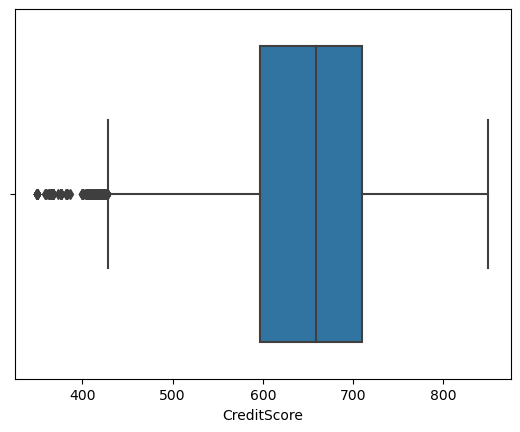

In [34]:
fig = sns.boxplot(df, x='CreditScore')
plt.show()

In [35]:
# в CreditScore есть выбросы
q1 = df['CreditScore'].quantile(.25)
q3 = df['CreditScore'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(427.5, 879.5)

In [36]:
print('Количество выбросов в столбце CreditScore:',len(df.loc[(df['CreditScore']>upper)|(df['CreditScore']<lower)]))

Количество выбросов в столбце CreditScore: 253


In [37]:
correlation_matrix = df.corr()

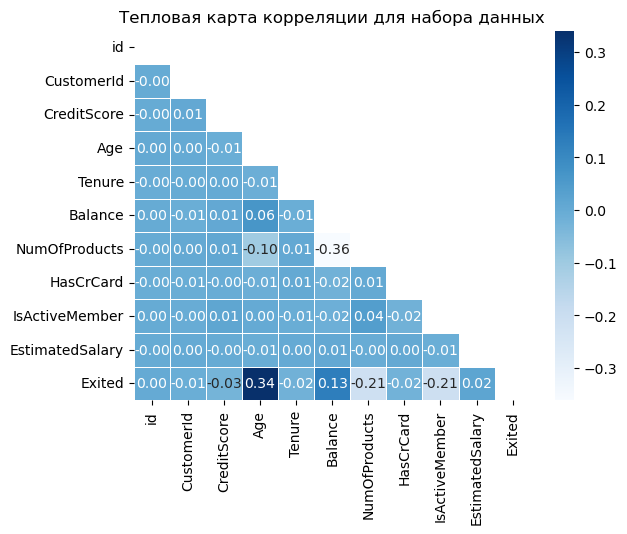

In [38]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Тепловая карта корреляции для набора данных')
plt.show()

Это одно из подтвержений гипотезы, что не хватает какого-то функционала или удобства для людей возраста от 30 до 40.

# Preprocessing for model

In [39]:
X,y = df.drop(['Surname','id','CustomerId','Exited'], axis=1), df['Exited']

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=42, stratify=y)

In [41]:
le = LabelEncoder()

In [42]:
X_train['Geography'] = le.fit_transform(X_train['Geography'])
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Geography'] = le.fit_transform(X_test['Geography'])
X_test['Gender'] = le.fit_transform(X_test['Gender'])                                                

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

LogisticRegression
accuracy_score 0.8249765201320932
Precision Score 0.6695701039617871
Recall Score 0.3412084765177549
F1 Score 0.452053495210092


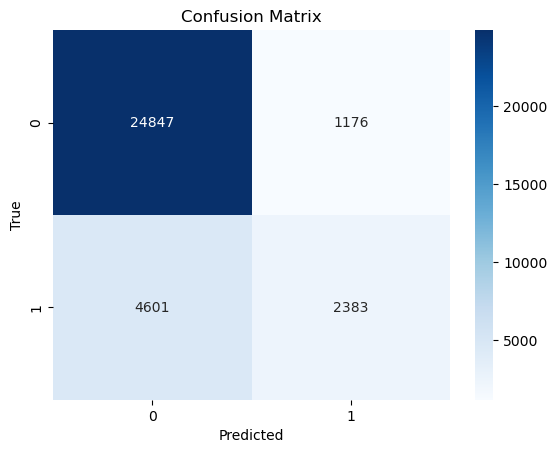

--------------------------------------------------------------------------
KNeighborsClassifier
accuracy_score 0.8472445238888721
Precision Score 0.6775137111517368
Recall Score 0.5306414662084765
F1 Score 0.595150152561426


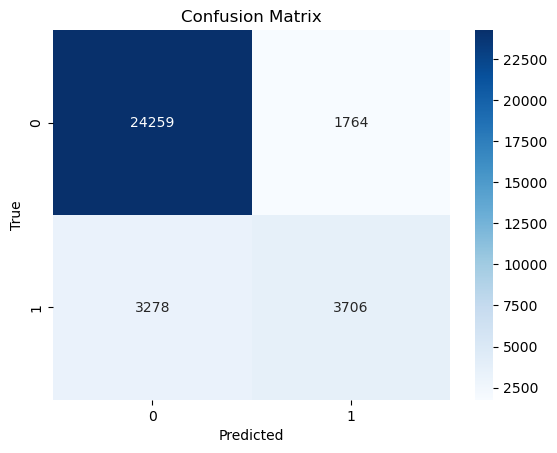

--------------------------------------------------------------------------
RandomForestClassifier
accuracy_score 0.8460932529463447
Precision Score 0.8059125964010283
Recall Score 0.359106529209622
F1 Score 0.4968304278922345


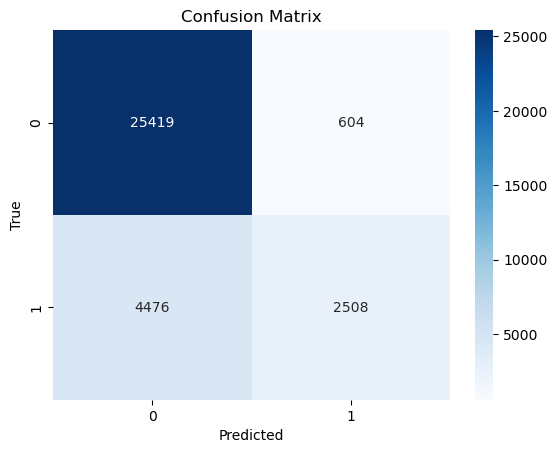

--------------------------------------------------------------------------


In [48]:
for clf in (log_reg, knn, rnd_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print('accuracy_score', accuracy_score(y_test, y_pred))
    print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test, y_pred))
    print('F1 Score', f1_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred)
    , annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print('--------------------------------------------------------------------------')

На месте банка я бы ориентировался на метрику Recall, которая отображает полноту. Почему?

Для банка важно определить всех клиентов, которые потенциально могут уйти, чтобы применить нужные маркетинговые стратегии и попытаться вернуть их в лояльный сегмент клиентов. Поэтому важно найти всех, кто попадает под эту категорию.

В то же время, чтобы понимать точность алгоритма и не спамить лояльных клиентов стоит обращать на метрику F1.

Поэтому наилучший алгоритм это KNeighborsClassifier с параметрами

**Recall:** 0.53

**F1:** 0.59